In [1]:
from google.colab import files
files.upload()  # Upload your downloaded CSV


Saving archive (4).zip to archive (4).zip


{'archive (4).zip': b'PK\x03\x04-\x00\x00\x00\x08\x00Qf0Q\xecf\x15\xd9\xff\xff\xff\xff\xff\xff\xff\xff8\x00\x14\x00amazon_com-product_reviews__20200101_20200331_sample.csv\x01\x00\x10\x00V:\x01\x00\x00\x00\x00\x00\xd30\x00\x00\x00\x00\x00\x00\xed}\xd9r\xe3H\x92\xed\xfb|\x05\xa4kS\xd5\x0bS\x89})\xb3\xb16\xee\xfb\xbe\xf3\xa5-\x00\x04$T\x92\x04\x0b\x00\x93\xc5~\x9a\xf7\xfb\x03w\x9e\xee\xbf\xcd\x17\xdcO\xb8\xee\x1e\x00I)S=\xa9\xd2XYZ\r\xaa\xabZ\x12\t\xc4\xe2\xe1\xe1\xe7\x84\x87\x87\xc7|\x1f\xfe"\xb5\xfdR5f\xa7\xad4\x0bw<I\xd9\xeeP\xaa\x84\xdbm\xb8\x7f\x94\xf2\xef\',\x85?K\x13\xfe9\xe4\'x.\xdd\xf2\xfc\x8f\xe7_\xd5X\xcaK\xf3\x84\xc7\xf8V%f{(\x1b>z\x8c\xe2sizt\xa5\xcb\x1f\xa38\xf2\x8f^*\xd5x\xe2\xc5\xe1!\r\xa3}\xa9\x9c\x84\xfb\xd2<\xde\xe6\x85U\xa3}\xca\xf7ii\xc1\xe30\x08\xb9/\x8d\x8e\xb1\xf7\xc4\x12^j\xf1\xed!8n\xa5\xcb\x83Gx\xac\xcf\xf6\xc7\x80y\xe91\x86\xea\'<9D\xfb\x84\xff\x8b"\xfb\xb6k+\xbeg:\x9a\xef\xdaL\x0b\x1c\x95+\x8ej\xe8\x86j\xf8\x86VReU\xfe k\x1f\x14K\x92\xd5\x9f4\xf5\'E\x96\xfe*\

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


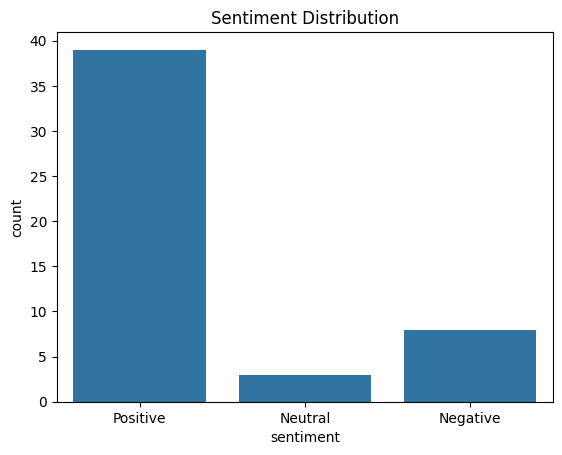

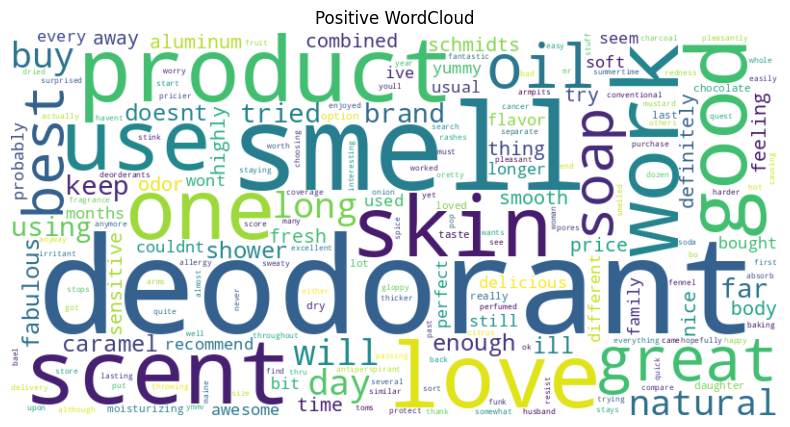

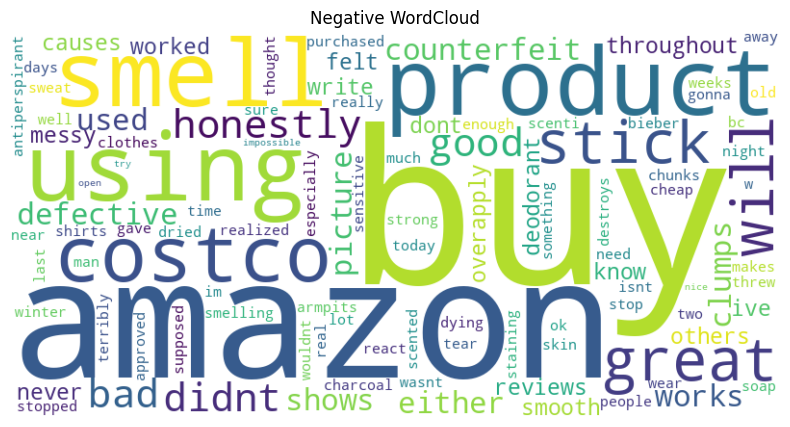

Sample: I absolutely hate this product. It made my skin worse.
Predicted Sentiment: Negative

Real-time Review Sentiment Classifier (type 'q' to quit)

Enter a review: this made my skin worse!!!! bad product it is!
Sentiment: Negative
----------------------------------------
Enter a review: q


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('/content/drive/MyDrive/archive (4).zip')
df = df[['Review Content', 'Review Rating']].dropna()
df = df.rename(columns={'Review Content': 'text', 'Review Rating': 'overall'})

def label_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['overall'].apply(label_sentiment)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.show()

def generate_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{sentiment} WordCloud")
    plt.show()

generate_wordcloud("Positive")
generate_wordcloud("Negative")

df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

def predict_sentiment(text):
    cleaned = clean_text(text)
    polarity = TextBlob(cleaned).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

sample = "I absolutely hate this product. It made my skin worse."
print("Sample:", sample)
print("Predicted Sentiment:", predict_sentiment(sample))

print("\nReal-time Review Sentiment Classifier (type 'q' to quit)\n")
while True:
    user_input = input("Enter a review: ")
    if user_input.lower() == 'q':
        break
    print("Sentiment:", predict_sentiment(user_input))
    print("-" * 40)


In [8]:
# 📦 Save the trained models
import joblib

# Save Naive Bayes model
joblib.dump(nb_model, 'naive_bayes_model_task2.pkl')

# Save Logistic Regression model
joblib.dump(lr_model, 'logistic_regression_model_task2.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer_task2.pkl')

print("✅ Models and vectorizer saved successfully.")


✅ Models and vectorizer saved successfully.


In [9]:
from google.colab import files

files.download('naive_bayes_model_task2.pkl')
files.download('logistic_regression_model_task2.pkl')
files.download('tfidf_vectorizer_task2.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for model training
X = df['clean_text']
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Evaluate models (optional, but good practice)
nb_predictions = nb_model.predict(X_test_tfidf)
lr_predictions = lr_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

Naive Bayes Accuracy: 0.9
Logistic Regression Accuracy: 0.9

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10


Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m